In [31]:
import GravityMachineTrack
import imp
import pandas as pd
import numpy as np
import os
imp.reload(GravityMachineTrack)
import matplotlib.pyplot as plt
import FigureParameters
%matplotlib notebook
# %matplotlib qt


# trackFile = '/Users/deepak/Documents/GravityMachine_testData/Polychaete_4D/Polychaete6/track_mod.csv'
# trackFile = 'E:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Starfish/StarFish10/track_mod.csv'
# trackFile = 'E:/HopkinsEmbroyologyCourse_GoodData/2018_06_13/Snail/snail10/track_mod.csv'
# trackFile = 'F:/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Polychaete_4D/Polychaete6/track_mod.csv'
# trackFile = 'E:/Hopkins_2018_08_31/MarSno2/track_mod.csv'
# trackFile = 'E:/HopkinsEmbroyologyCourse_GoodData/2018_06_11/Dendraster_starved_11Days_nofood/Dendraster3/track_mod.csv'



# track = GravityMachineTrack.gravMachineTrack(trackFile = trackFile, Tmin=0, Tmax = 0, findDims = False)

track_file = 'D:/GravityMachine_2020/GravityMachine_Codebase_v2_Rachel_CalibrationBeads_23_12_2020/bead_6_2020-12-23 21-16-38/track000.csv'

track_df = pd.read_csv(track_file)



# Define mapping between common and actual variable names
VARIABLE_MAP = {'Time':'Time', 'X_obj':'X_objStage','Y_obj':'Y_objStage','Z_obj':'Z_objStage','Image name':'DF1', 'X_image':'X_image', 'Z_image':'Y_image'}

COLORS = {'X_obj':'r', 'Y_obj':'g', 'Z_obj':'b'}

VARIABLE_NAMES = {'Time':'Time (s)','X_obj':'X position (mm)', 'Y_obj':'Y position (mm)', 'Z_obj':'Z position (mm)'}

len(track_df)

6133

In [19]:
# Crop the track to choose a time interval
T_min = 0
T_max = 90

if(T_max==0):
    T_max = np.max(track_df[VARIABLE_MAP['Time']])

Tmin_index = next((i for i,x in enumerate(track_df[VARIABLE_MAP['Time']]) if x >= T_min), None)
Tmax_index = next((i for i,x in enumerate(track_df[VARIABLE_MAP['Time']]) if x >= T_max), None)

print(Tmin_index)
print(Tmax_index)


track_df = track_df[Tmin_index:Tmax_index]

len(track_df)

0
3242


3242

<IPython.core.display.Javascript object>


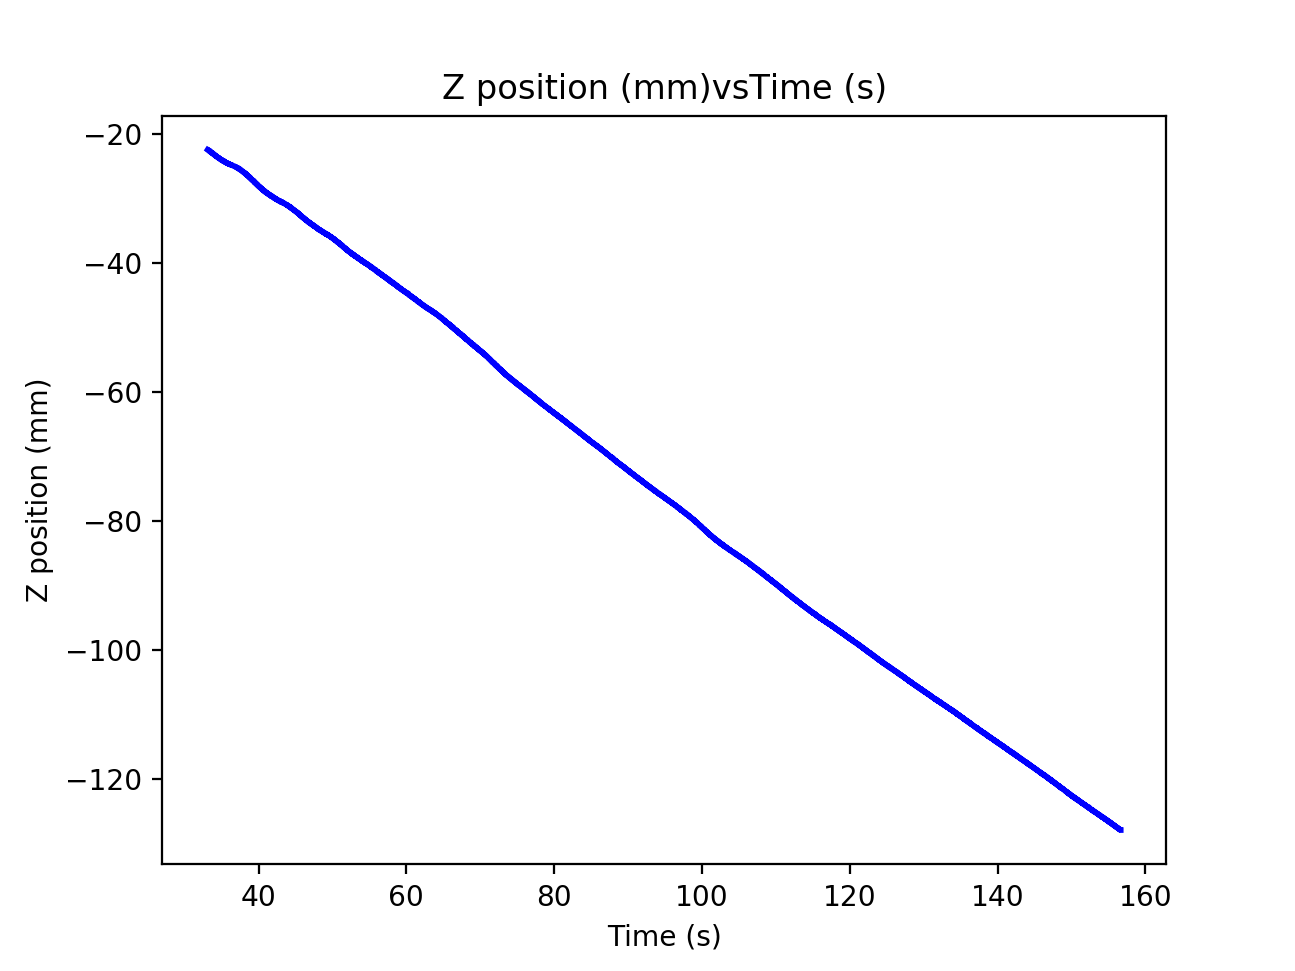

In [32]:
# Plots of tracks

# Virtual depth vs time
plt.figure()

plt.plot(track_df[VARIABLE_MAP['Time']], track_df[VARIABLE_MAP['Z_obj']], color = COLORS['Z_obj'], linewidth = 2)

plt.xlabel(VARIABLE_NAMES['Time'])
plt.ylabel(VARIABLE_NAMES['Z_obj'])

plt.title(VARIABLE_NAMES['Z_obj'] + 'vs' + VARIABLE_NAMES['Time'])
plt.show()

In [33]:
# Fit a line to extract the sinking speed

p = np.polyfit(track_df[VARIABLE_MAP['Time']], track_df[VARIABLE_MAP['Z_obj']], deg = 1)

U_measured = abs(p[0])
print('Average sinking speed: {} mm/s'.format(U_measured))

# Predicted sinking-speed based on Stokes-Law
dia = 250e-6 
rho_sphere = 1022.4 # Density in kg/m^3
rho_water = 1000 # Density of water
mu_water = 0.00091 # Viscosity of water in Pa.s
g = 9.81 # Acceleration due to gravity
U_stokes = 1000*(2/9)*((rho_sphere - rho_water)*g*(dia/2)**2)/(mu_water)  # Stokes velocity predicted in mm/s

print('Predicted sinking speeds: {} mm/s'.format(U_stokes))

print('Relative error: {} %'.format(100*abs(U_measured - U_stokes)/U_stokes))

Average sinking speed: 0.8687763668154247 mm/s
Predicted sinking speeds: 0.8384615384615376 mm/s
Relative error: 3.615529987160851 %


Text(0, 0.5, 'Z velocity (mm/s)')

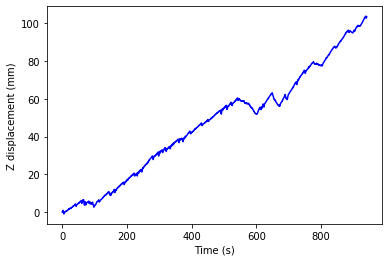

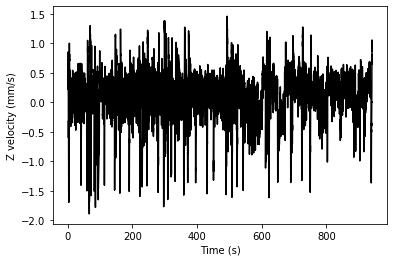

In [54]:
# plt.figure()
# # Raw data
# # plt.plot(track.df['Time'], track.df['ZobjWheel'], color = 'k', linestyle = '-')
# # Data interpolated to equispaced time vector
# plt.plot(track.T, track.ZobjWheel, color = 'b', linestyle = '-')
# plt.xlabel('Time (s)')
# plt.ylabel('Z displacement (mm)')
# # plt.savefig('A sanguniea_Down_Up_Swimming.svg', dpi = 150)


# # Vertical velocity
# plt.figure()
# # Raw data
# # plt.plot(track.df['Time'], track.df['ZobjWheel'], color = 'k', linestyle = '-')
# # Data interpolated to equispaced time vector
# plt.plot(track.T, track.Vz_smooth, color = 'k', linestyle = '-')
# plt.xlabel('Time (s)')
# plt.ylabel('Z velocity (mm/s)')
# # plt.savefig('A sanguniea_Down_Up_Swimming.svg', dpi = 150)


In [7]:
A

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# Post-processed datasets

In [7]:
# analysis_file = 'E:/GravitMachineTracks_Oct2019/Euglena/track1/track000_0_0_analysis.csv'
# analysis_file = 'E:/GravitMachineTracks_Oct2019/Euglena/track5/track002_0_0_analysis.csv'

# analysis_file = 'F:/Monterey_2019/2019_08_15/Akshiwo_sp/dino11/track002_0_78_analysis.csv'

analysis_file = 'E:/Diatom-GM-data_Summer2019/DrugPerturbation/Wailesii_Controls/track2/track000_0_0_analysis.csv'

analysis_df = pd.read_csv(analysis_file)

Zpos_raw = analysis_df['Zpos_raw']

Zpos_corrected = analysis_df['ZobjWheel']

Xpos_raw = analysis_df['Xpos_raw'] - analysis_df['Xpos_raw'][0]

Xpos_corrected = analysis_df['Xobj']

Time = analysis_df['Time']

# Z-velocity

<IPython.core.display.Javascript object>


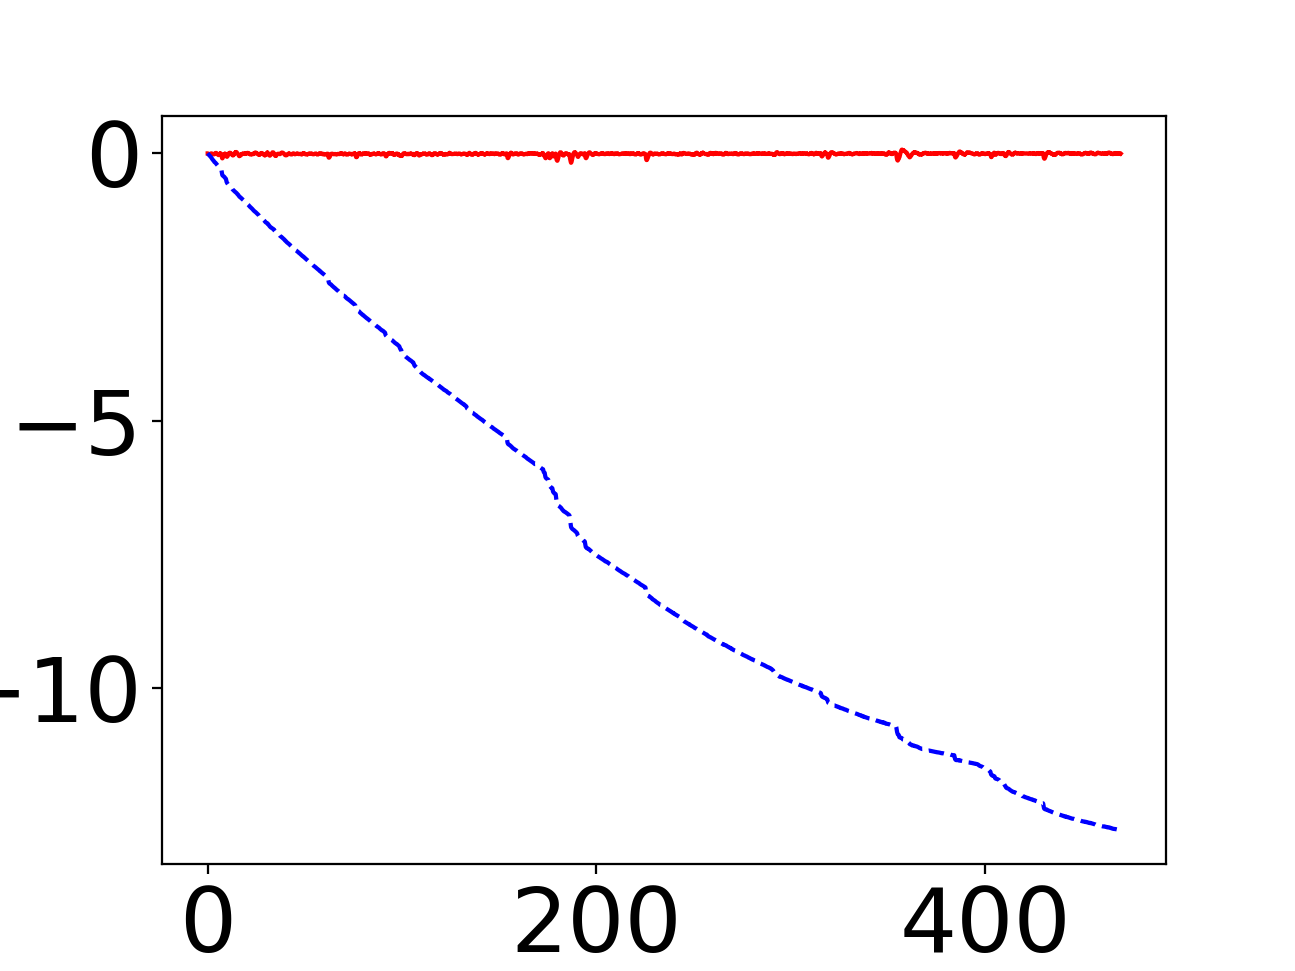

<IPython.core.display.Javascript object>


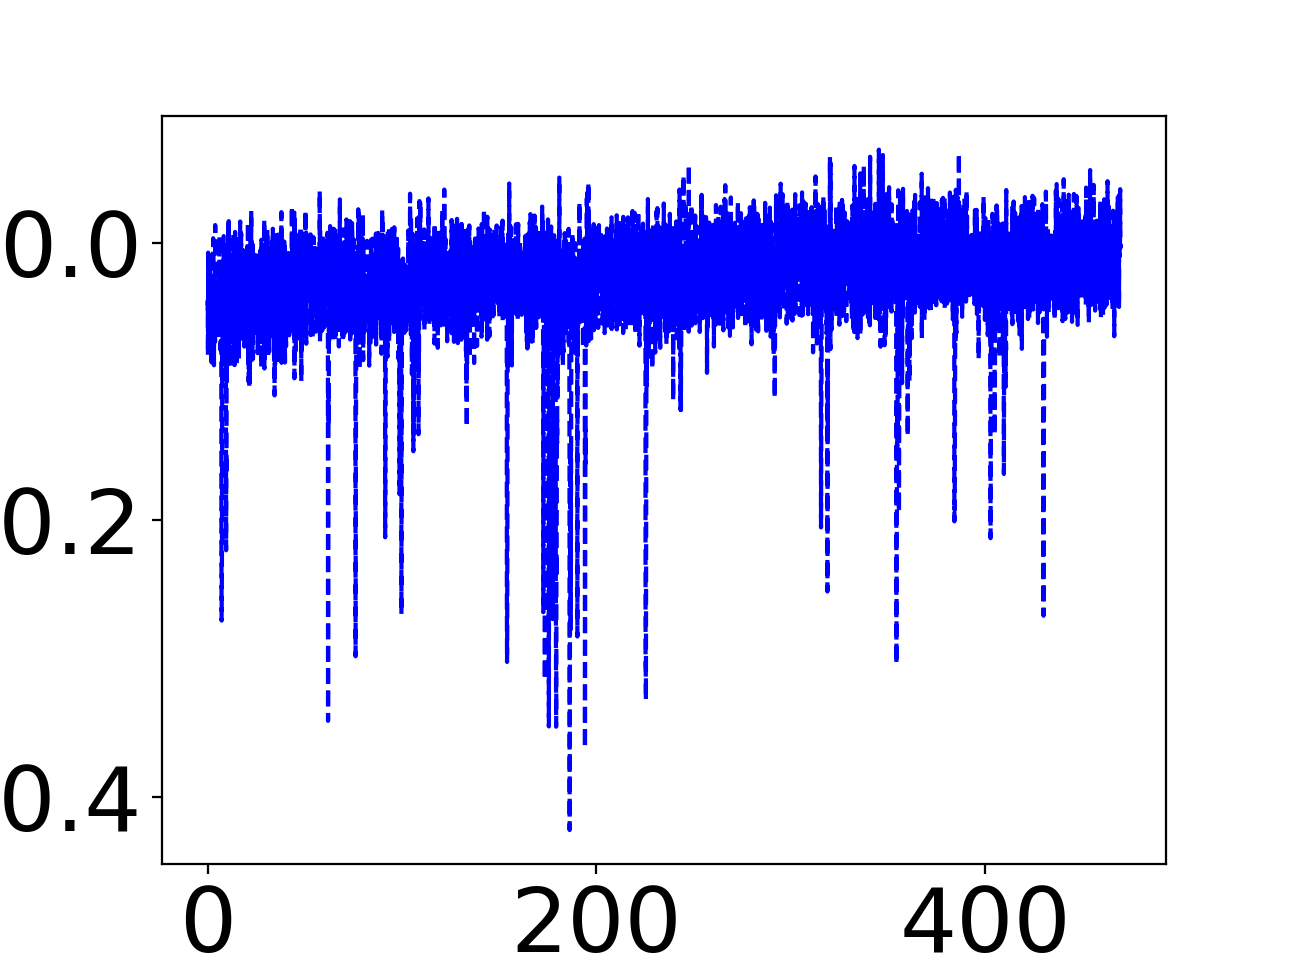

Mean +- Std of Vertical velocity: -0.02683742316924637 +- 0.037491406623411445


In [8]:
# Vertical velocity
plt.figure()
# Raw data
# plt.plot(track.df['Time'], track.df['ZobjWheel'], color = 'k', linestyle = '-')
# Data interpolated to equispaced time vector
plt.plot(Time, Zpos_raw, color = 'r', linestyle = '-')
plt.plot(Time, Zpos_corrected, color = 'b', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('Z position (mm)')
# plt.savefig('A sanguniea_Down_Up_Swimming.svg', dpi = 150)

# Vertical velocity
plt.figure()
# Raw data
# plt.plot(track.df['Time'], track.df['ZobjWheel'], color = 'k', linestyle = '-')
# Data interpolated to equispaced time vector
plt.plot(Time, analysis_df['Zvel'], color = 'b', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('Z velocity (mm/s)')
# plt.savefig('A sanguniea_Down_Up_Swimming.svg', dpi = 150)


print('Mean +- Std of Vertical velocity: {} +- {}'.format(np.nanmean(analysis_df['Zvel']), np.nanstd(analysis_df['Zvel'])))




# X- velocity

Text(0, 0.5, 'x velocity (mm/s)')

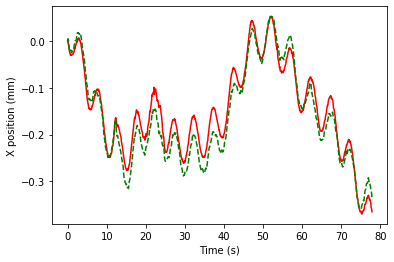

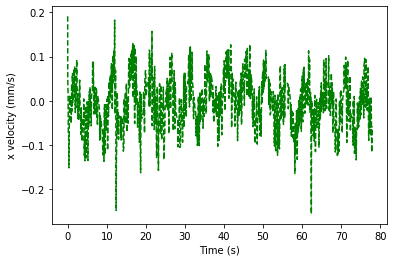

In [21]:
# Vertical velocity
plt.figure()
# Raw data
# plt.plot(track.df['Time'], track.df['ZobjWheel'], color = 'k', linestyle = '-')
# Data interpolated to equispaced time vector
plt.plot(Time, Xpos_raw, color = 'r', linestyle = '-')
plt.plot(Time, Xpos_corrected, color = 'g', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('X position (mm)')
# plt.savefig('A sanguniea_Down_Up_Swimming.svg', dpi = 150)

# Vertical velocity
plt.figure()
# Raw data
# plt.plot(track.df['Time'], track.df['ZobjWheel'], color = 'k', linestyle = '-')
# Data interpolated to equispaced time vector
plt.plot(Time, analysis_df['Xvel'], color = 'g', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('x velocity (mm/s)')
# plt.savefig('A sanguniea_Down_Up_Swimming.svg', dpi = 150)